In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(521)

In [11]:
def sigmoid(inp,deriv=False):
    fx = 1.0/(1+np.exp(-inp))
    if deriv == True:
        return fx*(1-fx)
    else:
        return fx

In [12]:
def create_data():
    X = pd.read_csv("hw02_data_set_images.csv",header=None).values
    _Y = pd.read_csv("hw02_data_set_labels.csv",header=None).values
    Y = np.zeros((_Y.shape[0],5))
    for k in range(_Y.shape[0]):
        if _Y[k] == "A":
            Y[k,0] = 1
        if _Y[k] == "B":
            Y[k,1] = 1
        if _Y[k] == "C":
            Y[k,2] = 1
        if _Y[k] == "D":
            Y[k,3] = 1
        if _Y[k] == "E":
            Y[k,4] = 1
            
    return X,Y

In [13]:
def split_data(X,Y):
    Y_train = np.r_[Y[0:25,:],Y[39:64,:],Y[78:103,:],Y[117:142,:],Y[156:181,:]]
    Y_test = np.r_[Y[25:39,:],Y[64:78,:],Y[103:117,:],Y[142:156,:],Y[181:195,:]]
    X_train = np.r_[X[0:25,:],X[39:64,:],X[78:103,:],X[117:142,:],X[156:181,:]]
    X_test = np.r_[X[25:39,:],X[64:78,:],X[103:117,:],X[142:156,:],X[181:195,:]]
    return X_train,X_test,Y_train,Y_test

In [14]:
def initialize_parameters(X,Y):
    W = np.random.uniform(low=-0.01,high=0.0,size=(X.shape[1],Y.shape[1]))
    W0 = np.random.uniform(low=-0.01,high=0.0,size=(Y.shape[1]))
    return W,W0

In [15]:
def forward(X,W,W0):
    s_out = X.dot(W) + W0
    Y_pred = sigmoid(s_out)
    return s_out,Y_pred
    

In [16]:
def loss_and_grad(s_out,Y_pred,Y,X):
    loss = (((Y_pred-Y)**2)/2).sum()
    
    d_loss = Y_pred-Y
    
    l_out_error = d_loss*sigmoid(s_out,deriv=True)
    
    W_delta = (X.T).dot(l_out_error)
    W0_delta = l_out_error.sum()
    
    return loss,W_delta,W0_delta

In [24]:
def train(X_train,Y_train):
    
    W,W0 = initialize_parameters(X_train,Y_train)

    
    eta = 1.e-2
    epsilon = 1.e-3
    
    loss_list = []
    epoch_list = []
    
    epoch = 0
    
    while(True):
            
        W_old = W.copy()
        W0_old = W0.copy()
        
        s_out,Y_pred = forward(X_train,W,W0)
        
        loss,W_delta,W0_delta = loss_and_grad(s_out,Y_pred,Y_train,X_train)
        W -= eta*W_delta
        W0 -= eta*W0_delta
        
        loss_list.append(loss)
        epoch_list.append(epoch)
        
        epoch += 1
        
        if (((W0 - W0_old)**2).sum() + ((W - W_old)**2).sum())**0.5 < epsilon:
            break

    
    return loss_list,epoch_list,W,W0
        

In [25]:
def conf_m(expected, predicted, n_classes=5):
    m = np.zeros((n_classes,n_classes))
    for pred, exp in zip(predicted, expected):
        m[pred][exp] += 1
    return m

In [32]:
def create_conf_matrix(X_train,Y_train,X_test,Y_test,W,W0):
    _,Y_pred_train = forward(X_train,W,W0)
    _,Y_pred_test = forward(X_test,W,W0)
    
    Y_pred_train = Y_pred_train.argmax(1)
    Y_pred_test = Y_pred_test.argmax(1)
    
    Y_expected_train = Y_train.argmax(1)
    Y_expected_test = Y_test.argmax(1)
    
    
    train_conf_matrix = conf_m(Y_expected_train,Y_pred_train)
    test_conf_matrix = conf_m(Y_expected_test,Y_pred_test)
    
    return train_conf_matrix,test_conf_matrix

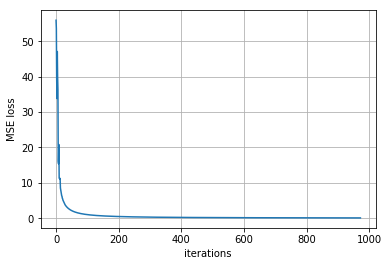

In [33]:

X,Y = create_data()
X_train,X_test,Y_train,Y_test = split_data(X,Y)
loss_list,epoch_list,W,W0 = train(X_train,Y_train)


train_conf_matrix,test_conf_matrix = create_conf_matrix(X_train,Y_train,X_test,Y_test,W,W0)

plt.plot(epoch_list,loss_list)
plt.grid()
plt.xlabel("iterations")
plt.ylabel("MSE loss")
plt.show()

In [35]:
test_conf_matrix

array([[13.,  1.,  0.,  0.,  0.],
       [ 1., 11.,  0.,  0.,  2.],
       [ 0.,  0., 14.,  0.,  0.],
       [ 0.,  1.,  0., 14.,  0.],
       [ 0.,  1.,  0.,  0., 12.]])